# Perencanaan Iklan Game
- Kamu bekerja di toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Kamu perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kamu bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.

- Di depanmu ada data dari tahun 2016. Coba deh bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan kamu sedang merencanakan kampanye untuk tahun 2017.

- Dataset ini memuat singkatan ESRB. ESRB merupakan singkatan dari Entertainment Software Rating Board, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Tujuan dari case / project ini adalah untuk menemukan game yang paling potensial dan merencanakan iklannya dengan berdasar pada data yang sudah tersedia.

# Langkah Pengerjaan:
    1. Buka file data dan pelajari informasi umumnya
    2. Siapkan datanya
    3. Analisis datanya
    4. Lakukan pemrofilan pengguna untuk masing-masing wilayah
    5. Uji hipotesisnya
    6. Tulis kesimpulannya secara menyeluruh

# Deskripsi data

- Name (nama)
- Platform
- Year_of_Release (tahun rilis)
- Genre
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

Data untuk tahun 2016 mungkin tidak lengkap.

## Buka File Data dan Pelajari Informasi Umumnya

### Buka File Data
File path:

/datasets/games.csv

In [ ]:
# Import Library Data Processing
import pandas as pd
import numpy as np

# Import Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library Statistics
import scipy.stats as st
from scipy import stats


In [ ]:
# Muat file data ke dalam DataFrame
data = pd.read_csv('/datasets/games.csv')

### Pelajari Informasi Umumnya
Deskripsi data
- Name (nama)
- Platform
- Year_of_Release (tahun rilis)
- Genre
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

Data untuk tahun 2016 mungkin tidak lengkap.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data.duplicated().sum())

data duplicate 0


**Kesimpulan**
- Terdapat data yang hilang (missing values) pada beberapa kolom, yaitu "Name," "Year_of_Release," "Genre," "Critic_Score," "User_Score," dan "Rating."
- Terdapat ketidakseragaman dalam penulisan huruf besar dan kecil dalam beberapa kolom.
- Tipe data ada yang tidak sesuai, antara lain
    - "Year_of_Release" memiliki tipe data float64 seharusnya integer atau datetime
    - "User_Score" memiliki tipe data object seharusnya numerik (float64)
    - "Rating" memiliki tipe data object  seharusnya kategori (category)
- Tidak ada duplikasi data

## Siapkan Data

### Mengganti nama kolom menggunakan huruf kecil semua

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
# Checking perubahan huruf pada kolom
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Konversikan data ke tipe data yang dibutuhkan.

In [ ]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Kolom "year_of_release"**

In [ ]:
# Konversi "year_of_release" ke tipe data integer:(asumsi tahun diisi 0 untuk tahun yang hilang nilainya)
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

**Kolom "user_score"**

In [ ]:
# mencari nilai "tbd"
tbd_rows = data[data['user_score'] == 'tbd']
tbd_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
jumlah_tbd = len(tbd_rows)
jumlah_tbd

2424

In [ ]:
# Konversi "User_Score" ke tipe data float:(terdapat nilai TBD, sehingga tbd akan diubah menjadi NaN)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**Kolom "rating"**

In [ ]:
# Konversi "rating" ke tipe data category:
data['rating'] = data['rating'].astype('category')

In [ ]:
# Checking
data.dtypes

name                 object
platform             object
year_of_release       int64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object

### Mencari dan Memperbaiki Nilai yang Hilang

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
# Mencari Data yang hilang
missing_values = data.isnull().sum()
missing_values

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
# Persentase data yang hilang
(data.isnull().sum() / len(data)*100).sort_values()

platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
rating             40.478612
critic_score       51.319174
user_score         54.591684
dtype: float64

#### Memperbaiki nilai  yang hilang pada kolom "name" dan "genre"
Memperbaiki nilai yang hilang dengan menghapus/drop dikarenakan hanya terdapat 2 entry data yang hilang

In [ ]:
data.dropna(subset=['name'], inplace=True)

In [ ]:
data.dropna(subset=['genre'], inplace=True)

In [ ]:
# Checking
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

#### Nilai Hilang pada Kolom "critic_score dan user_score"

In [ ]:
data_null = data.loc[(data['critic_score'].isnull()) & (data['user_score'].isnull()), :]
data_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


#### Memperbaiki nilai yang hilang dengan mengisisi dengan nilai median
Menggunakan median dikarenakan perbedaan nilai mean dan median pada **summary statistics** tidak terlalu besar pada kolom critic_score dan user_score.


In [ ]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,1974.191348,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,252.574959,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [ ]:
# pada kolom critic_score
median_critic_score = data['critic_score'].median()
data['critic_score'].fillna(median_critic_score, inplace=True)

In [ ]:
# pada kolom user_score
median_user_score = data['user_score'].median()
data['user_score'].fillna(median_user_score, inplace=True)

In [ ]:
# Checking
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

#### Nilai Hilang pada Kolom "rating"

In [ ]:
data_null = data.loc[data['rating'].isnull(), :]
data_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


#### Memperbaiki nilai yang hilang dengan mengisi dengan nilai mode berdasar pada genre
Menggunakan nilai modus yang muncul yang berdasar pada tiap genre.


In [ ]:
# Mengisi nilai yang hilang di kolom "rating"
data['rating'].fillna(data.groupby('genre')['rating'].transform(lambda x: x.mode().iloc[0]), inplace=True)

In [ ]:
# Checking
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Total Penjualan

Untuk menghitung total penjualan dapat dilakukukan dengan cara menambahkan seluruh kolom yang berisi data penjualan game. Berikut caranya :
- total_sales = na_sales + eu_sales + jp_sales + other_sales

In [ ]:
# Menghitung total penjualan untuk tiap game pada kolom baru
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
# Checking apakah sudah ada kolom total_sales
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,T,31.38


Kesimpulan Tahap 2:

- Nama kolom sudah di ganti menggunakan huruf kecil
- Tipe data sudah di konversi ke tipe data yang dibutuhkan
- Data hilang sudah di perbaiki
- Total penjualalan didapatkan dengan menjumlahkan sales di setiap wilayahnya, yang disimpan dalam variabel baru dengan nama total_sales.

## Analisis Data

### Berapa banyak game yang dirilis pada tahun yang berbeda

In [ ]:
# Menghitung jumlah game yang dirilis pada setiap tahun
game_count_by_year = data.groupby(['year_of_release'])['name'].count().reset_index()
game_count_by_year

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


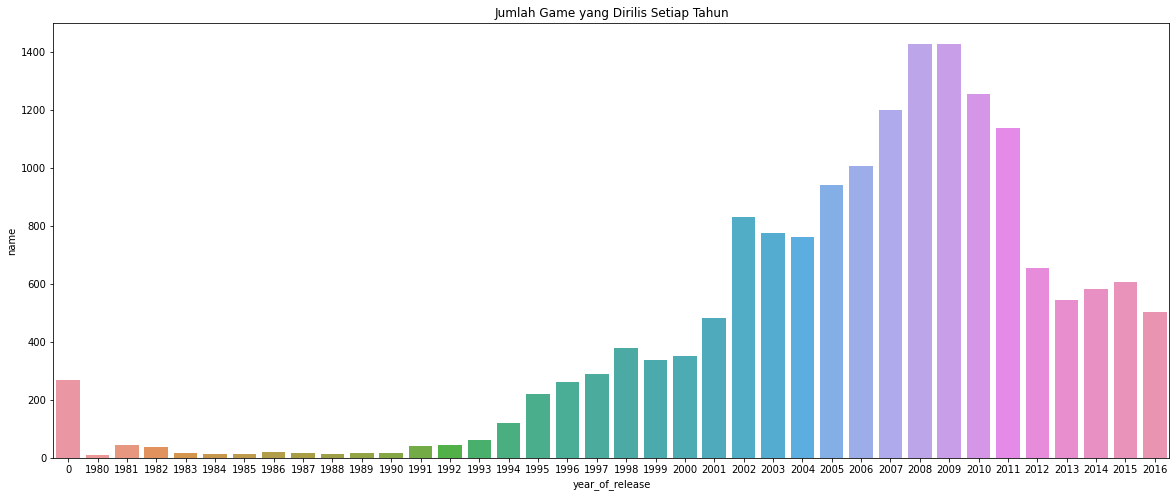

In [ ]:
# Barplot / diagram batang 'Jumlah Game yang Dirilis Setiap Tahun'
plt.figure(figsize=(20,8))
sns.barplot(data=game_count_by_year, x='year_of_release', y='name');
plt.title('Jumlah Game yang Dirilis Setiap Tahun');

**Kesimpulan :**
- Terdapat tahun 0 yang merilis 269 game. Karena tidak ada tahun 0 maka ini kemungkinan terjadi karena adanya data yang tidak lengkap yang tidak mengetahui tahun berapa game tersebut dirilis.
- Jumlah game yang dirilis tiap tahunnya mengalami peningkatan yang signifikan seiring berjalannya waktu.
- Bacaan diarm batang :

Terdapat beberapa tahun di mana jumlah game yang dirilis jauh lebih tinggi daripada tahun-tahun sebelumnya, dimulai pada tahun 2002 terus naik hingga tren puncaknya berada di tahun 2008-2009 dan mengalami penurunan tren setelah tahun 2009.

### Bagaimana penjualan bervariasi dari satu platform ke platform lainnya

In [ ]:
# Hitung total penjualan per platform
total_sales_per_platform = data.groupby('platform')['total_sales'].sum().sort_values().reset_index()
total_sales_per_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [ ]:
# Pilih platform dengan total penjualan terbesar
platform_with_highest_sales = total_sales_per_platform.sort_values(by='total_sales', ascending=False).iloc[0]['platform']
platform_with_highest_sales

'PS2'

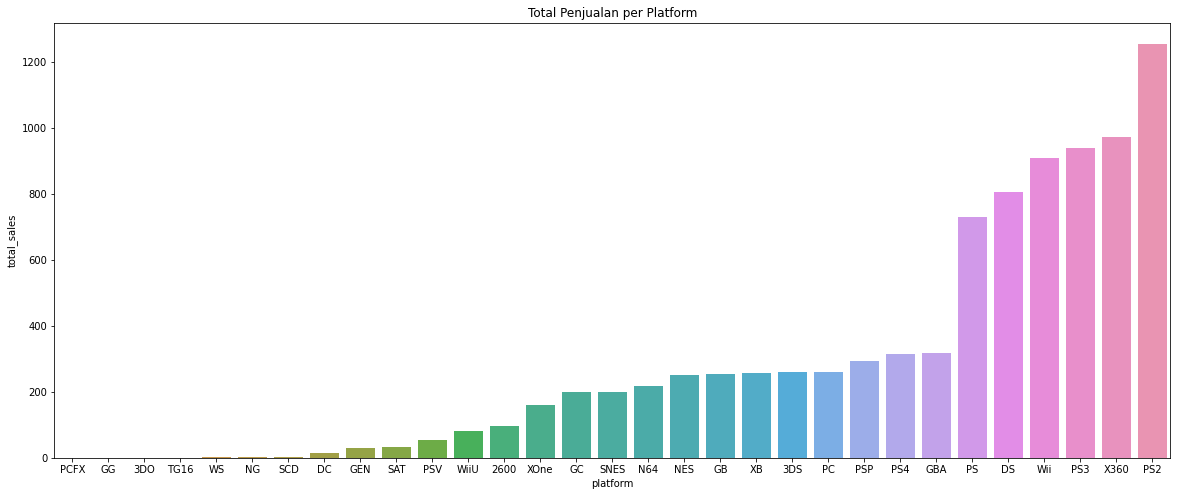

In [ ]:
# Barplot / diagram batang 'Jumlah Game yang Dirilis Setiap Tahun'
plt.figure(figsize=(20,8))
sns.barplot(data=total_sales_per_platform, x='platform', y='total_sales');
plt.title('Total Penjualan per Platform');

**Kesimpulan:**
- Platform dengan total penjualan terbesar dimiliki oleh 'PS2'


#### Platform yang dahulu populer tetapi sekarang tidak memiliki penjualan

In [ ]:
# Filter data untuk platform tersebut contohnya PS2
platform_data = data[data['platform'] == platform_with_highest_sales]
platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01


In [ ]:
# Membersihkan data dari tahun rilis 0
platform_data = platform_data[platform_data['year_of_release'] != 0]


In [ ]:
# Hitung total penjualan per tahun untuk platform PS2
total_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
total_sales_by_year

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

In [ ]:
# Temukan tahun pertama dan tahun terakhir di mana penjualan terjadi:
first_year = total_sales_by_year.index.min()
print(f'Penjualan di tahun pertama berada di tahun {first_year}')

last_year = total_sales_by_year.index.max()
print(f'Penjualan di tahun terakhir berada di tahun {last_year}')


Penjualan di tahun pertama berada di tahun 2000
Penjualan di tahun terakhir berada di tahun 2011


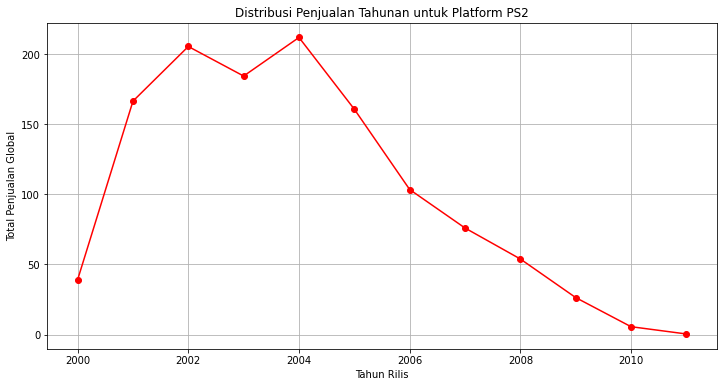

In [ ]:
# Plot distribusi penjualan per tahun
plt.figure(figsize=(12, 6))
plt.plot(total_sales_by_year.index, total_sales_by_year.values, marker='o', linestyle='-', color='r')
plt.title(f'Distribusi Penjualan Tahunan untuk Platform {platform_with_highest_sales}')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan Global')
plt.grid(True)
plt.show()

**Kesimpulan**

**Berikut pembacaan dari grafik "Distribusi Penjualan Tahunan untuk Platform PS2"**

Dapat dilihat pada contoh diatas yaitu PS2 adalah contoh platform yang paling populer yang memulai penjualannya di tahun 2000 yang kemudian menduduki puncak posisi penjualan terbesar di tahun 2004 lalu kemudian penjualannya mulai menurun dan bahkan hampir tidak ada penjualan di tahun 2011.

#### Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

In [ ]:
unique_platforms = data['platform'].unique()
unique_platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# Hilangkan data dengan tahun rilis 0
data = data[data['year_of_release'] != 0]

In [ ]:
# Menghitung total penjualan per tahun berdasarkan platform
total_sales_by_year_platform = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

In [ ]:
# Ambil 5 platform sampel yang paling umum
top_5_platforms = data.groupby('platform')['total_sales'].sum().nlargest(5).index
sample_data = data[data['platform'].isin(top_5_platforms)]

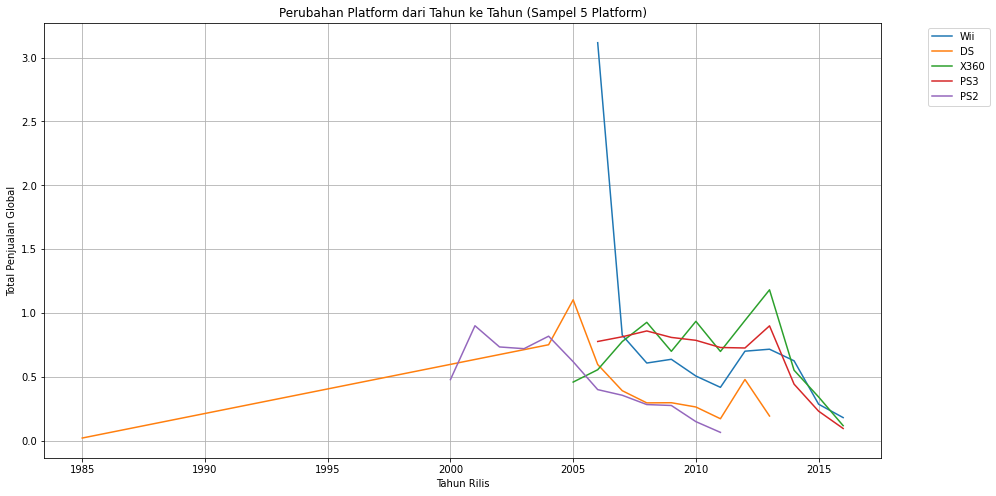

In [ ]:
# Grafim 5 sample Platforms
plt.figure(figsize=(15, 8))
sns.lineplot(data=sample_data, x='year_of_release', y='total_sales', hue='platform', palette='tab10', ci=None)  # Menghilangkan area bayangan (ci=None)
plt.title('Perubahan Platform dari Tahun ke Tahun (Sampel 5 Platform)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan Global')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

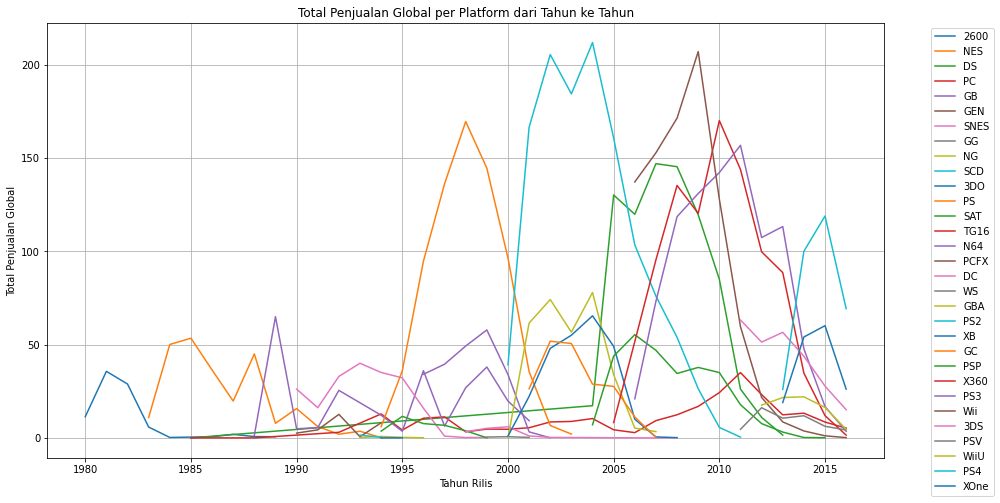

In [ ]:
# Grafik Keseluruhan Platforms
plt.figure(figsize=(15, 8))
sns.lineplot(data=total_sales_by_year_platform, x='year_of_release', y='total_sales', hue='platform', palette='tab10', ci=None)
plt.title('Total Penjualan Global per Platform dari Tahun ke Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan Global')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Kesimpulan:**

Diambil 5 sample agar grafik ebih mudah dibaca, yaitu menggunakan sample Wii, DS, X360, PS2, dan PS3. Dapat ditarik kesimpulan dari grafik yang ditampilkan bahwa rata-rata popularitasnya menurun sekitar 5 sampai 10 tahun.

#### Tentukan Periode Waktu Pengambilan data.
Untuk melakukannya, lihat jawabanmu di pertanyaan sebelumnya. Data yang kamu ambil seharusnya memungkinkan kamu untuk membangun model bagi tahun 2017.

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,T,31.38


In [ ]:
new_data = data[data['year_of_release']>=2012].reset_index(drop=True)

In [ ]:
data.shape, new_data.shape

((16444, 12), (2886, 12))

In [ ]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,T,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**Kesimpulan:**

Diambil periode data sejauh 5 tahun kebelakang agar analisis bisa lebih relevan, karena perkembangan dalam industri game sangat cepat.

#### Bekerja dengan data yang sudah relevan.
Selanjutnya dan seterusnya gunakan new_data (data yang sudah difilter 5 tahun kebelakang)
Abaikan data untuk tahun-tahun sebelumnya.

##### Platform mana saja yang memiliki penjualan terbanyak?
Untuk menemukan platform dengan penjualan terbanyak, dengan cara menghitung total penjualan per platform di periode waktu tersebut dan kemudian mengidentifikasi platform dengan penjualan tertinggi.

In [ ]:
# Menghitung total penjualan per platform
total_sales_by_platform = new_data.groupby('platform')['total_sales'].sum().reset_index()
total_sales_by_platform

,platform,total_sales
0,3DS,194.61
1,DS,12.55
2,PC,62.65
3,PS3,288.79
4,PS4,314.14
5,PSP,11.19
6,PSV,49.18
7,Wii,35.37
8,WiiU,82.19
9,X360,236.54


In [ ]:
# Mencari platform dengan penjualan terbanyak
platform_terlaris = total_sales_by_platform[total_sales_by_platform['total_sales'] == total_sales_by_platform['total_sales'].max()]
platform_terlaris


,platform,total_sales
4,PS4,314.14


In [ ]:
print("Platform dengan penjualan terbanyak adalah: PS4")

Platform dengan penjualan terbanyak adalah: PS4


**Kesimpulan:**

Platform dengan penjualan terbanyak adalah: PS4
    

##### Platform mana saja yang tumbuh atau menyusut?
Untuk mengetahui platform mana yang tumbuh atau menyusut, dengan cara membandingkan total penjualan di tahun terakhir (2016) dengan total penjualan di tahun pertama (2012) dan melihat perbedaannya.

In [ ]:
unique_platforms_new_data = new_data['platform'].unique()
unique_platforms_new_data

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [ ]:
# Menghitung total penjualan per platform pada tahun 2012
total_sales_2012 = new_data[new_data['year_of_release'] == 2012].groupby('platform')['total_sales'].sum().reset_index()
total_sales_2012

,platform,total_sales
0,3DS,51.36
1,DS,11.01
2,PC,23.22
3,PS3,107.36
4,PSP,7.69
5,PSV,16.19
6,Wii,21.71
7,WiiU,17.56
8,X360,99.74


In [ ]:
# Menghitung total penjualan per platform pada tahun 2016
total_sales_2016 = new_data[new_data['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().reset_index()
total_sales_2016

,platform,total_sales
0,3DS,15.14
1,PC,5.25
2,PS3,3.60
3,PS4,69.25
4,PSV,4.25
5,Wii,0.18
6,WiiU,4.60
7,X360,1.52
8,XOne,26.15


In [ ]:
# Menggabungkan data tahun 2012 dan 2016
sales_comparison = total_sales_2012.merge(total_sales_2016, on='platform', suffixes=('_2012', '_2016'))
sales_comparison


,platform,total_sales_2012,total_sales_2016
0,3DS,51.36,15.14
1,PC,23.22,5.25
2,PS3,107.36,3.60
3,PSV,16.19,4.25
4,Wii,21.71,0.18
5,WiiU,17.56,4.60
6,X360,99.74,1.52


In [ ]:
# Mencari platform yang menyusut (penjualan tahun 2016 lebih rendah dari tahun 2012)
platform_menyusut = sales_comparison[sales_comparison['total_sales_2016'] < sales_comparison['total_sales_2012']]['platform']
platform_menyusut

0     3DS
1      PC
2     PS3
3     PSV
4     Wii
5    WiiU
6    X360
Name: platform, dtype: object

In [ ]:
# Memilih data total penjualan tahun 2012 dan 2016 yang sesuai dengan platform yang menyusut
platform_menyusut_data = sales_comparison[sales_comparison['platform'].isin(platform_menyusut)]
platform_menyusut_data

,platform,total_sales_2012,total_sales_2016
0,3DS,51.36,15.14
1,PC,23.22,5.25
2,PS3,107.36,3.60
3,PSV,16.19,4.25
4,Wii,21.71,0.18
5,WiiU,17.56,4.60
6,X360,99.74,1.52


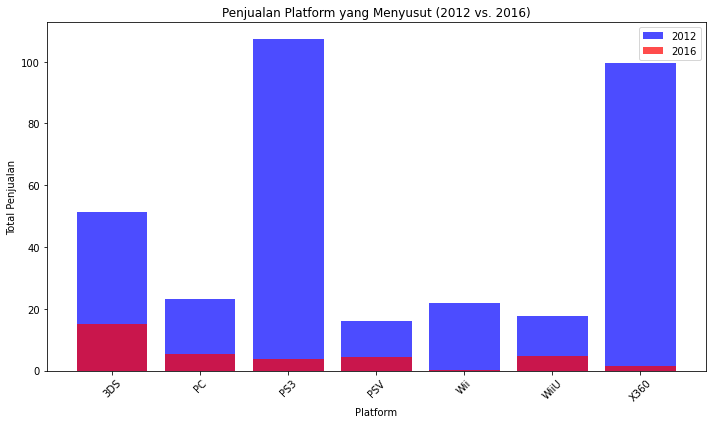

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(platform_menyusut_data['platform'], platform_menyusut_data['total_sales_2012'], label='2012', color='b', alpha=0.7)
plt.bar(platform_menyusut_data['platform'], platform_menyusut_data['total_sales_2016'], label='2016', color='r', alpha=0.7)

plt.title('Penjualan Platform yang Menyusut (2012 vs. 2016)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Kesimpulan:**

Dengan menggunakan data yang sudah di filter dengan membuat grafik 'Perbandingan Penjualan Platform dari Tahun 2012 ke 2016' dapat dilihat bahwa pwenjualan di tahun 2016 lebih rendah dari 2012.

##### Pilih beberapa platform yang berpotensi menghasilkan keuntungan.
Untuk memilih beberapa platform yang berpotensi menghasilkan keuntungan, Anda dapat mempertimbangkan platform-platform yang memiliki penjualan tinggi dan tren pertumbuhan positif dalam beberapa tahun terakhir.

In [ ]:
# Mengambil data total penjualan platform pada tahun 2016
platform_sales_2016 = total_sales_2016.sort_values(by='total_sales', ascending=False)


In [ ]:
# Memilih beberapa platform dengan penjualan tertinggi
top_platforms = platform_sales_2016.head(5)

In [ ]:
# Menampilkan platform-platform yang berpotensi menghasilkan keuntungan
print("Platform Berpotensi Menghasilkan Keuntungan:")
print(top_platforms)

Platform Berpotensi Menghasilkan Keuntungan:
  platform  total_sales
3      PS4        69.25
8     XOne        26.15
0      3DS        15.14
1       PC         5.25
6     WiiU         4.60


**Kesimpulan:**
Platform Berpotensi Menghasilkan Keuntungan: PS4, XOne, 3DS, PC, WiiU

#### Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform.
Apakah perbedaan penjualannya signifikan?

Bagaimana dengan penjualan rata-rata pada berbagai platform?

Deskripsikan penemuanmu.

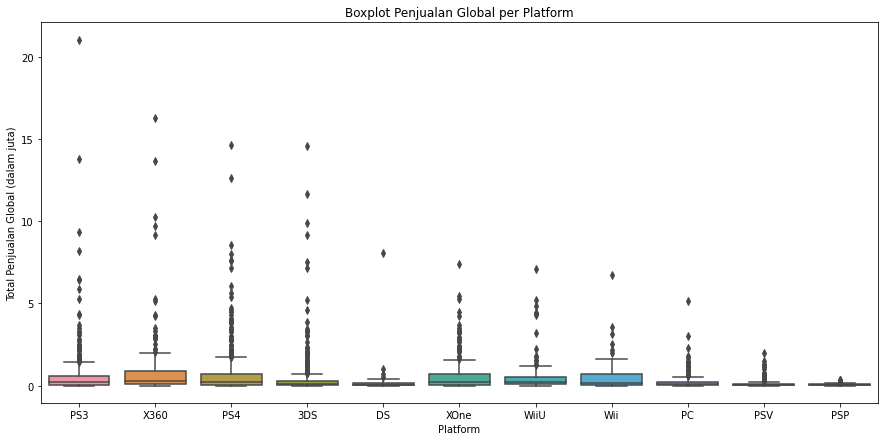

In [ ]:
# Buat boxplot dan tampilkan
plt.figure(figsize=(15, 7))
sns.boxplot(data=new_data, x='platform', y='total_sales');
plt.title('Boxplot Penjualan Global per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan Global (dalam juta)')
plt.show()

In [ ]:
new_data.groupby(['platform']).agg({
    'total_sales' : ['mean', 'median', 'min', 'max']
})

total_sales                    
                mean median   min    max
platform                                
3DS         0.491439   0.11  0.01  14.60
DS          0.404839   0.05  0.01   8.06
PC          0.250600   0.08  0.01   5.14
PS3         0.585781   0.20  0.01  21.05
PS4         0.801378   0.20  0.01  14.63
PSP         0.064682   0.03  0.01   0.36
PSV         0.119659   0.05  0.01   1.96
Wii         0.655000   0.18  0.01   6.76
WiiU        0.559116   0.22  0.01   7.09
X360        0.810068   0.31  0.01  16.27
XOne        0.645020   0.22  0.01   7.39

**Kesimpulan:**

- Bacaan dari boxplot diatas adalah terdapat banyak outlier, yang artinya ada nilai-nilai yang jauh lebih tinggi daripada kebanyakan data lainnya pada platform tersebut.
- PS3 memiliki nilai max = 21.05, dengan penjualan rata-rata berada di angka mean = 0.58.

#### Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang kamu pilih).
Buat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Kemudian, tarik kesimpulannya.

Dapat dibuat dengan cara memilih platform dan memfilter datanya kemudian membuat scatter plot. Setelah itu hitung korelasinya.

In [ ]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,T,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
# Pilih Platform PS4 kemudian filter datanya
PS4_data = new_data.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()


In [ ]:
PS4_data

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Adventure Time: Finn & Jake Investigations,0.10,71.0,7.5
2,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
3,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
4,PS4,Akiba's Trip: Undead & Undressed,0.11,71.0,7.5
...,...,...,...,...,...
387,PS4,Yakuza: Ishin,0.15,71.0,7.5
388,PS4,Yoru no Nai Kuni,0.08,71.0,7.5
389,PS4,ZombiU,0.06,71.0,7.5
390,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [ ]:
PS4_data.corr()['total_sales']

total_sales     1.000000
critic_score    0.338706
user_score     -0.062756
Name: total_sales, dtype: float64

<AxesSubplot:>

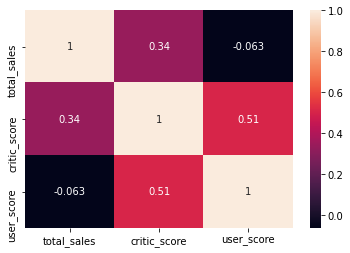

In [ ]:
sns.heatmap((PS4_data.corr()), annot=True)

Text(0.5, 1.0, 'Scatter Plot Ulasan Profesional vs. Penjualan untuk PS4')

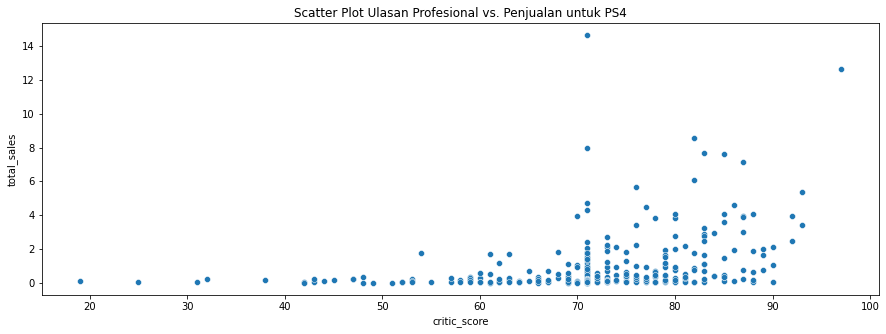

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=PS4_data, x='critic_score', y='total_sales')
plt.title('Scatter Plot Ulasan Profesional vs. Penjualan untuk PS4')


Text(0.5, 1.0, 'Scatter Plot Ulasan Pengguna vs. Penjualan untuk PS4')

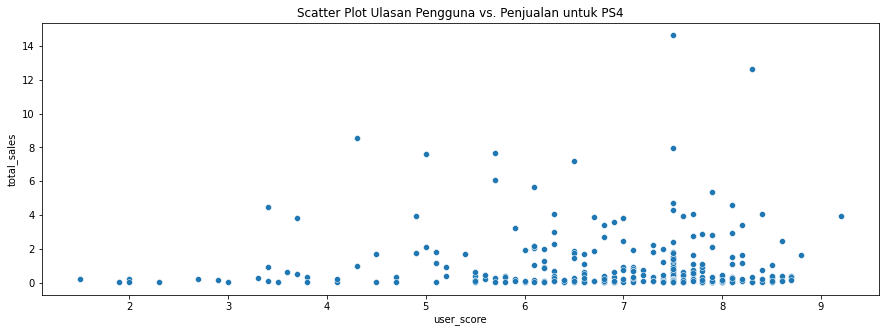

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=PS4_data, x='user_score', y='total_sales')
plt.title('Scatter Plot Ulasan Pengguna vs. Penjualan untuk PS4')


In [ ]:
# Hitung korelasi antara ulasan pengguna, ulasan profesional, dan penjualan
correlation_user = PS4_data['user_score'].corr(PS4_data['total_sales'])
correlation_critic = PS4_data['critic_score'].corr(PS4_data['total_sales'])

print(f"Korelasi antara Ulasan Pengguna dan Penjualan: {correlation_user:.2f}")
print(f"Korelasi antara Ulasan Profesional dan Penjualan: {correlation_critic:.2f}")

Korelasi antara Ulasan Pengguna dan Penjualan: -0.06
Korelasi antara Ulasan Profesional dan Penjualan: 0.34


**Kesimpulan:**
1. Korelasi antara Ulasan Pengguna dan Penjualan: Korelasi sekitar -0.06 bahwa tidak ada korelasi yang kuat antara ulasan pengguna dan penjualan pada platform "PS4." Dalam kata lain, tingkat ulasan pengguna tidak secara signifikan memengaruhi tingkat penjualan game pada platform PS4.

2. Korelasi antara Ulasan Profesional dan Penjualan: Korelasi sekitar 0.34 menunjukkan bahwa ada hubungan/korelasi positif yang lemah antara ulasan profesional dan penjualan pada platform "PS4". Artinya, semakin tinggi ulasan profesional suatu game, semakin tinggi juga penjualan game tersebut pada platform PS4. Namun, korelasi ini juga tidak sangat tinggi, sehingga ulasan profesional hanya memberikan pengaruh yang sedang terhadap penjualan.

##### Dengan berdasarkan pada kesimpulan yang tela dibuat, bandingkan penjualan game yang sama di platform lain.

In [ ]:
# Pilih platform lain yang ingin dibandingkan (saya mengambil XOne)
XOne_data = new_data.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum(
).query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()


In [ ]:
XOne_data

,platform,name,total_sales,critic_score,user_score
0,XOne,7 Days to Die,0.05,35.0,5.2
1,XOne,Adventure Time: Finn & Jake Investigations,0.05,71.0,7.5
2,XOne,Agatha Christie's The ABC Murders,0.01,66.0,7.5
3,XOne,Alien: Isolation,0.50,78.0,7.8
4,XOne,Angry Birds Star Wars,0.17,53.0,6.9
...,...,...,...,...,...
242,XOne,XCOM 2,0.04,87.0,8.1
243,XOne,ZombiU,0.01,71.0,7.5
244,XOne,Zombie Army Trilogy,0.11,62.0,7.2
245,XOne,Zoo Tycoon (2013),0.36,71.0,7.5


In [ ]:
XOne_data.corr()['total_sales']

total_sales     1.000000
critic_score    0.360451
user_score     -0.105937
Name: total_sales, dtype: float64

<AxesSubplot:>

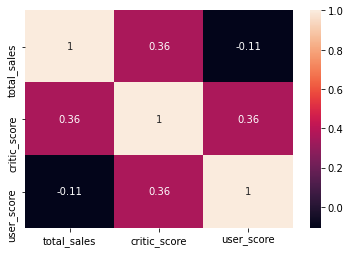

In [ ]:
sns.heatmap((XOne_data.corr()), annot=True)

Text(0.5, 1.0, 'Scatter Plot Ulasan Profesional vs. Penjualan untuk XOne')

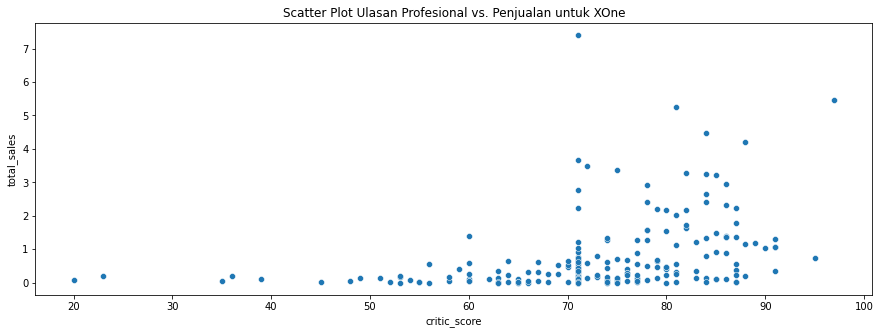

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=XOne_data, x='critic_score', y='total_sales')
plt.title('Scatter Plot Ulasan Profesional vs. Penjualan untuk XOne')

Text(0.5, 1.0, 'Scatter Plot Ulasan Profesional vs. Penjualan untuk XOne')

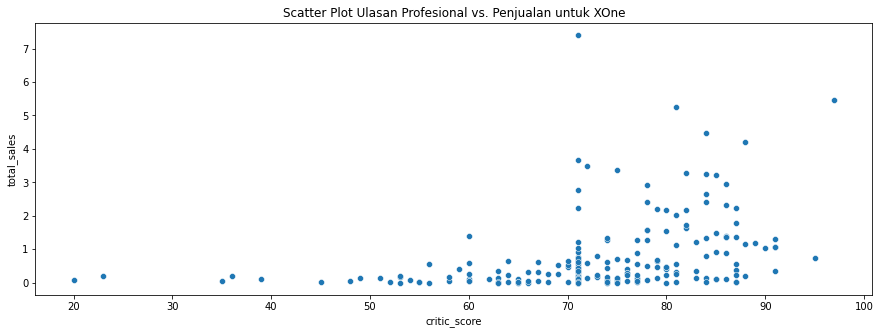

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=XOne_data, x='critic_score', y='total_sales')
plt.title('Scatter Plot Ulasan Profesional vs. Penjualan untuk XOne')

In [ ]:
# Hitung korelasi antara ulasan pengguna, ulasan profesional, dan penjualan
correlation_user = XOne_data['user_score'].corr(XOne_data['total_sales'])
correlation_critic = XOne_data['critic_score'].corr(XOne_data['total_sales'])

print(f"Korelasi antara Ulasan Pengguna dan Penjualan: {correlation_user:.2f}")
print(f"Korelasi antara Ulasan Profesional dan Penjualan: {correlation_critic:.2f}")

Korelasi antara Ulasan Pengguna dan Penjualan: -0.11
Korelasi antara Ulasan Profesional dan Penjualan: 0.36


**Kesimpulan:**

Platform PS4:
- Korelasi antara ulasan pengguna dan penjualan: -0.06
- Korelasi antara ulasan profesional dan penjualan: 0.34

Platform XOne:
- Korelasi antara ulasan pengguna dan penjualan: -0.11
- Korelasi antara ulasan profesional dan penjualan: 0.36

**Dari hasil korelasi diatas, terlihat bahwa :**
 - Korelasi antara ulasan profesional dan penjualan lebih tinggi daripada korelasi antara ulasan pengguna dan penjualan pada kedua platform (PS4 dan XOne).

- Meskipun demikian, pada keduanya, korelasi antara ulasan pengguna dengan penjualan adalah negatif (berarti tidak ada korelasi yang signifikan), sedangkan korelasi antara ulasan profesional dengan penjualan adalah positif (berarti ada sedikit korelasi positif).

##### Amati distribusi umum game berdasarkan genre

Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan?

Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?


In [ ]:
# Menghitung total penjualan global per genre
genre_sales = new_data.groupby('genre')['total_sales'].sum().reset_index()


In [ ]:
# Mengurutkan genre berdasarkan total penjualan
genre_sales_sorted = genre_sales.sort_values(by='total_sales', ascending=False)

In [ ]:
# Menampilkan genre dengan total penjualan tertinggi
genre_tertinggi = genre_sales_sorted.iloc[0]['genre']
print(f"Genre dengan Total Penjualan Tertinggi: {genre_tertinggi}")

Genre dengan Total Penjualan Tertinggi: Action


In [ ]:
# Mengklasifikasikan genre berdasarkan total penjualan (misal: Top 3 dan Bottom 3)
top_genre = genre_sales_sorted.head(3)
bottom_genre = genre_sales_sorted.tail(3)

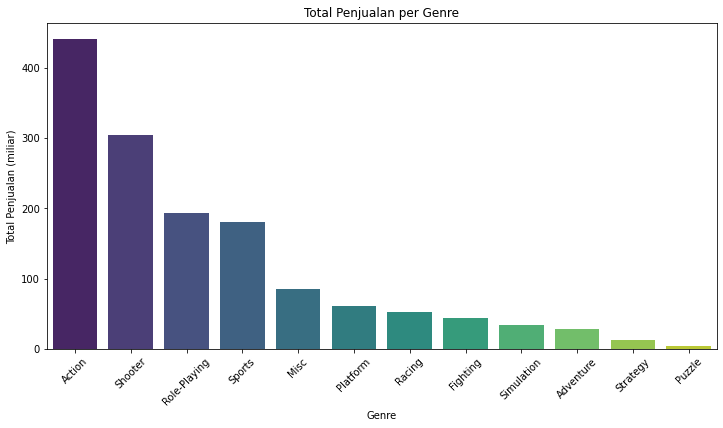

In [ ]:
# Visualisasi total penjualan per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales_sorted, x='genre', y='total_sales', palette='viridis')
plt.title('Total Penjualan per Genre')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (miliar)')
plt.xticks(rotation=45);

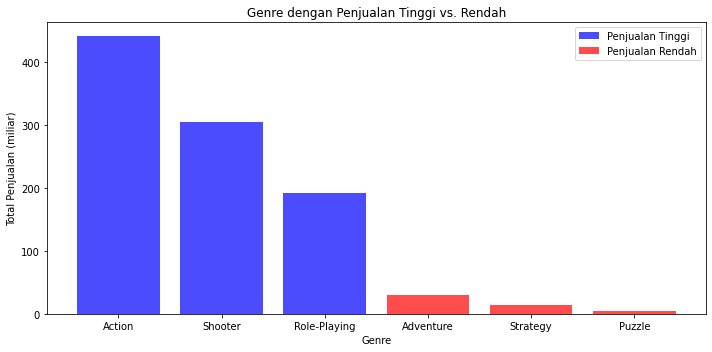

In [ ]:
# Visualisasi genre dengan total penjualan tertinggi dan terendah
plt.figure(figsize=(10, 5))
plt.bar(top_genre['genre'], top_genre['total_sales'], color='blue', alpha=0.7, label='Penjualan Tinggi')
plt.bar(bottom_genre['genre'], bottom_genre['total_sales'], color='red', alpha=0.7, label='Penjualan Rendah')
plt.title('Genre dengan Penjualan Tinggi vs. Rendah')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (miliar)')
plt.legend()

plt.tight_layout()
plt.show()

**Kesimpulan:**
- Genre yang paling menguntungkan adalah genre action karena penjualannya yang tertinggi.
- Sebaliknya genre dengan penjualan terendah adalah genre puzzle.

## Lakukan Pemrofilan Pengguna untuk Masing-Masing Wilayah
Untuk setiap wilayah (NA, EU, JP), tentukan:
- 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
- 5 genre teratas. Jelaskan perbedaannya.
- Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

### Platform Teratas untuk NA, EU, JP

In [ ]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,T,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
new_data.groupby(['platform'])['total_sales'].sum(). sort_values().reset_index()

,platform,total_sales
0,PSP,11.19
1,DS,12.55
2,Wii,35.37
3,PSV,49.18
4,PC,62.65
5,WiiU,82.19
6,XOne,159.32
7,3DS,194.61
8,X360,236.54
9,PS3,288.79


In [ ]:
platform_sales_agg = new_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_sales_agg2 = new_data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [ ]:
platform_sales_agg2['total_sales'] = platform_sales_agg2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

In [ ]:
# Hitung MS untuk variasi pangsa pasar di ketiga wilayah
platform_sales_agg2['na_sales_MS'] = platform_sales_agg2['na_sales'] / platform_sales_agg2['total_sales']*100
platform_sales_agg2['eu_sales_MS'] = platform_sales_agg2['eu_sales'] / platform_sales_agg2['total_sales']*100
platform_sales_agg2['jp_sales_MS'] = platform_sales_agg2['jp_sales'] / platform_sales_agg2['total_sales']*100


In [ ]:
platform_sales_agg2

,platform,na_sales,eu_sales,jp_sales,total_sales,na_sales_MS,eu_sales_MS,jp_sales_MS
0,3DS,55.31,42.64,87.79,185.74,29.778185,22.956821,47.264994
1,DS,4.59,3.53,3.72,11.84,38.766892,29.814189,31.418919
2,PC,19.12,37.76,0.00,56.88,33.614627,66.385373,0.000000
3,PS3,103.38,106.86,35.29,245.53,42.104834,43.522177,14.372989
4,PS4,108.74,141.09,15.96,265.79,40.911998,53.083261,6.004741
5,PSP,0.13,0.42,10.47,11.02,1.179673,3.811252,95.009074
6,PSV,10.98,11.36,21.04,43.38,25.311203,26.187183,48.501614
7,Wii,17.45,11.92,3.39,32.76,53.266178,36.385836,10.347985
8,WiiU,38.10,25.13,13.01,76.24,49.973767,32.961700,17.064533
9,X360,140.05,74.52,1.57,216.14,64.795966,34.477653,0.726381


<AxesSubplot:xlabel='platform'>

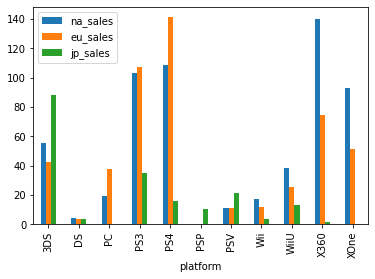

In [ ]:
platform_sales_agg.plot(kind='bar')

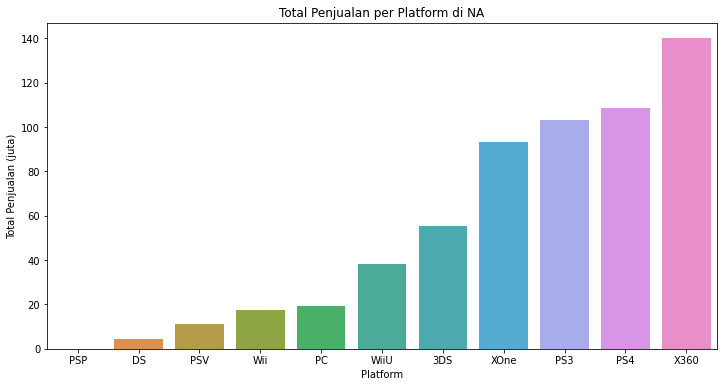

In [ ]:
# Visualisasi total penjualan per platform untuk NA
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales_agg2.sort_values(by='na_sales'), x='platform', y='na_sales')
plt.title('Total Penjualan per Platform di NA')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta)');

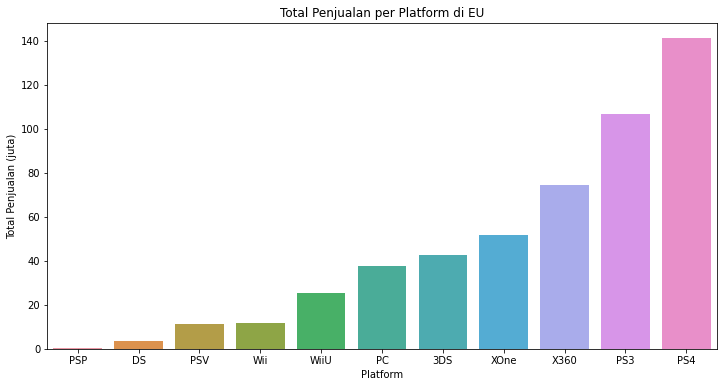

In [ ]:
# Visualisasi total penjualan per platform untuk EU
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales_agg2.sort_values(by='eu_sales'), x='platform', y='eu_sales')
plt.title('Total Penjualan per Platform di EU')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta)');

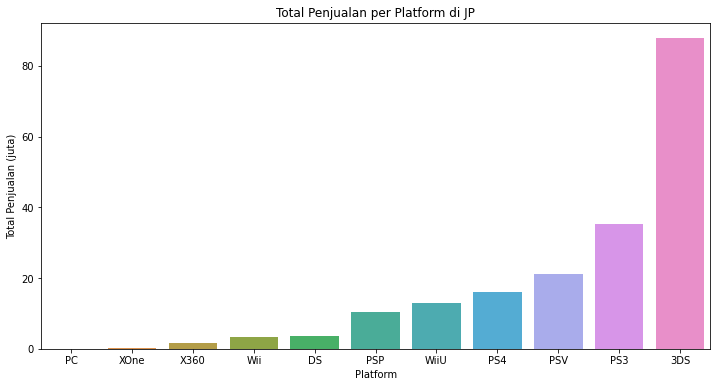

In [ ]:
# Visualisasi total penjualan per platform untuk JP
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales_agg2.sort_values(by='jp_sales'), x='platform', y='jp_sales')
plt.title('Total Penjualan per Platform di JP')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta)');

**Kesimpulan**
- Dalam wilayah NA, 5 platform teratas berdasarkan total penjualan adalah X360, PS4, PS3, XOne, dan 3DS.
- Di wilayah EU, platform teratas adalah PS4, diikuti oleh PS4, PS3, X360, XOne, 3DS.
- Di wilayah JP, platform teratas adalah 3DS, diikuti oleh 3DS, PS3, PSV, PS4, dan WiiU.

Untuk variasi pangsa pasar di ketiga  wilayah tersebut dapat ditarik kesimpulan:
- NA = Penjualan di dominasi oleh X360.
- EU =  Penjualan didominasi oleh PC.
- JP =  Penjualan didominasi oleh PSP

### Genre teratas

In [ ]:
genre_sales_agg = new_data.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_sales_agg2 = new_data.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()


In [ ]:
genre_sales_agg

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


<AxesSubplot:xlabel='genre'>

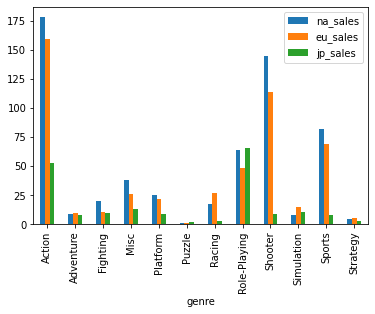

In [ ]:
genre_sales_agg.plot(kind='bar')

**Kesimpulan**

- Genre "Role-Playing" sangat populer di wilayah JP, sementara genre "Shooter" dominan di wilayah NA dan EU.
- Genre "Action" tetap menjadi genre dengan penjualan tinggi secara keseluruhan.

### Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [ ]:
new_data['rating'].value_counts()

T       1163
E        885
M        532
E10+     306
AO         0
EC         0
K-A        0
RP         0
Name: rating, dtype: int64

In [ ]:
rating_sales_agg = new_data.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_sales_agg

,rating,na_sales,eu_sales,jp_sales
0,AO,0.00,0.00,0.00
1,E,141.52,144.98,53.40
2,E10+,75.70,55.37,8.19
3,EC,0.00,0.00,0.00
4,K-A,0.00,0.00,0.00
5,M,251.43,211.19,22.29
6,RP,0.00,0.00,0.00
7,T,122.32,95.28,108.70


In [ ]:
rating_sales_agg_non_zero = rating_sales_agg[(rating_sales_agg['na_sales'] > 0) | (rating_sales_agg['eu_sales'] > 0) | (rating_sales_agg['jp_sales'] > 0)]
rating_sales_agg_non_zero

,rating,na_sales,eu_sales,jp_sales
1,E,141.52,144.98,53.40
2,E10+,75.70,55.37,8.19
5,M,251.43,211.19,22.29
7,T,122.32,95.28,108.70


**Kesimpulan:**

Rating ESRB memengaruhi penjualan game di berbagai wilayah, dapat dilihat rating "M" dan "E"memiliki dampak yang cukup signifikan di wilayah NA dan EU. Sedangkan rating "T" memiliki dampak yang cukup besar juga untuk wilayah NA dan JP.  

## Uji hipotesis
Uji hipotesis-hipotesis berikut:
- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.

Tentukan nilai ambang batas alpha.

Jelaskan:
- Bagaimana kamu merumuskan hipotesis nol dan hipotesis alternatif
- Berapa tingkat signifikansi yang kamu pilih untuk menguji hipotesis dan jelaskan alasanmu memilih angka tersebut

### Uji Hipotesis
- H0 = Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA
- H1 = Rata-rata rating pengguna platform Xbox One dan PC adalah BERBEDA

In [ ]:

new_data['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

In [ ]:
new_data_2 = new_data[(new_data['user_score'].notnull())].reset_index(drop=True)

In [ ]:
new_data_2.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [ ]:
new_data_pc = new_data[(new_data['platform']=='PC') & (new_data['user_score'].notnull())].reset_index(drop=True)
new_data_xone = new_data[(new_data['platform']=='XOne') & (new_data['user_score'].notnull())].reset_index(drop=True)

In [ ]:
new_data_pc.shape, new_data_xone.shape

((250, 12), (247, 12))

In [ ]:
np.var(new_data_pc['user_score']), np.var(new_data_xone['user_score'])

(2.4382241600000003, 1.5831195397400384)

In [ ]:
# Tentukan alpha
alpha = 0.05

In [ ]:
# H0 ----> varians sama
# H1 ----> varians tidak sama

p_value_levene = stats.levene(new_data_xone['user_score'], new_data_pc['user_score']).pvalue

print(p_value_levene)

if p_value_levene < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


0.010128312548547527
Reject the null hypothesis


**Kesimpulan**

Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0).

Artinya, terdapat cukup bukti statistik yang mendukung bahwa rata-rata rating pengguna platform Xbox One dan PC berbeda secara signifikan.

### Uji t-test (independen)


In [ ]:
# Uji t-test (independen)
p_value = stats.ttest_ind(new_data_xone['user_score'], new_data_pc['user_score'], equal_var=False).pvalue

print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


0.20480155503400296
Accept the null hypothesis


**Kesimpulan**

Hasil pengujian uji t-test independen dengan asumsi variances tidak sama (equal_var=False) diatas menunjukkan bahwa p-value lbih besar dari nilai alpha.
Artinya, dari uji ini tidak menemukan perbedaan yang signifikan antara kedua kelompok tersebut dalam hal rating pengguna.

## Kesimpulan Umum

**Kesimpulan Tahap 1:**

- Terdapat data yang hilang (missing values) pada beberapa kolom, yaitu "Name," "Year_of_Release," "Genre," "Critic_Score," "User_Score," dan "Rating."
- Terdapat ketidakseragaman dalam penulisan huruf besar dan kecil dalam beberapa kolom.
- Tipe data ada yang tidak sesuai, antara lain
    - "Year_of_Release" memiliki tipe data float64 seharusnya integer atau datetime
    - "User_Score" memiliki tipe data object seharusnya numerik (float64)
    - "Rating" memiliki tipe data object seharusnya kategori (category)
- Tidak ada duplikasi data

**Kesimpulan Tahap 2:**
- Nama kolom sudah di ganti menggunakan huruf kecil
- Tipe data sudah di konversi ke tipe data yang dibutuhkan
- Data hilang sudah di perbaiki
- Total penjualalan didapatkan dengan menjumlahkan sales di setiap wilayahnya, yang disimpan dalam variabel baru dengan nama total_sales.

**Kesimpulan Tahap 3:**
**Berapa banyak game yang dirilis pada tahun yang berbeda**
- Terdapat tahun 0 yang merilis 269 game. Karena tidak ada tahun 0 maka ini kemungkinan terjadi karena adanya data yang tidak lengkap yang tidak mengetahui tahun berapa game tersebut dirilis.
- Jumlah game yang dirilis tiap tahunnya mengalami peningkatan yang signifikan seiring berjalannya waktu.
- Bacaan diagram batang :
Terdapat beberapa tahun di mana jumlah game yang dirilis jauh lebih tinggi daripada tahun-tahun sebelumnya, dimulai pada tahun 2002 terus naik hingga tren puncaknya berada di tahun 2008-2009 dan mengalami penurunan tren setelah tahun 2009.

**Bagaimana penjualan bervariasi dari satu platform ke platform lainnya**
- Platform dengan total penjualan terbesar dimiliki oleh 'PS2'

**Platform yang dahulu populer tetapi sekarang tidak memiliki penjualan**
- Berikut pembacaan dari grafik "Distribusi Penjualan Tahunan untuk Platform PS2"
Dapat dilihat pada contoh diatas yaitu PS2 adalah contoh platform yang paling populer yang memulai penjualannya di tahun 2000 yang kemudian menduduki puncak posisi penjualan terbesar di tahun 2004 lalu kemudian penjualannya mulai menurun dan bahkan hampir tidak ada penjualan di tahun 2011.

**Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?**
- Diambil 5 sample agar grafik ebih mudah dibaca, yaitu menggunakan sample Wii, DS, X360, PS2, dan PS3. Dapat ditarik kesimpulan dari grafik yang ditampilkan bahwa rata-rata popularitasnya menurun sekitar 5 sampai 10 tahun.

**Tentukan Periode Waktu Pengambilan data**
- Diambil periode data sejauh 5 tahun kebelakang agar analisis bisa lebih relevan, karena perkembangan dalam industri game sangat cepat.

**Bekerja dengan data yang sudah relevan.**
- Platform dengan penjualan terbanyak adalah: PS4

**Platform mana saja yang tumbuh atau menyusut?**
- Dengan menggunakan data yang sudah di filter dengan membuat grafik 'Perbandingan Penjualan Platform dari Tahun 2012 ke 2016' dapat dilihat bahwa pwenjualan di tahun 2016 lebih rendah dari 2012

**Pilih beberapa platform yang berpotensi menghasilkan keuntungan.**
- Platform Berpotensi Menghasilkan Keuntungan:
 PS4, XOne, 3DS, PC, WiiU
           
**Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform.**
- Bacaan dari boxplot diatas adalah terdapat banyak outlier, yang artinya ada nilai-nilai yang jauh lebih tinggi daripada kebanyakan data lainnya pada platform tersebut.
- PS3 memiliki nilai max = 21.05, dengan penjualan rata-rata berada di angka mean = 0.58.

**Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang kamu pilih).**
- Korelasi antara Ulasan Pengguna dan Penjualan: Korelasi sekitar -0.06 bahwa tidak ada korelasi yang kuat antara ulasan pengguna dan penjualan pada platform "PS4." Dalam kata lain, tingkat ulasan pengguna tidak secara signifikan memengaruhi tingkat penjualan game pada platform PS4.

- Korelasi antara Ulasan Profesional dan Penjualan: Korelasi sekitar 0.34 menunjukkan bahwa ada hubungan/korelasi positif yang lemah antara ulasan profesional dan penjualan pada platform "PS4". Artinya, semakin tinggi ulasan profesional suatu game, semakin tinggi juga penjualan game tersebut pada platform PS4. Namun, korelasi ini juga tidak sangat tinggi, sehingga ulasan profesional hanya memberikan pengaruh yang sedang terhadap penjualan.

**Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.**

**Platform PS4:**

- Korelasi antara ulasan pengguna dan penjualan: -0.06
- Korelasi antara ulasan profesional dan penjualan: 0.34

**Platform XOne:**

- Korelasi antara ulasan pengguna dan penjualan: -0.11
- Korelasi antara ulasan profesional dan penjualan: 0.36

**Dari hasil korelasi diatas, terlihat bahwa :**

- Korelasi antara ulasan profesional dan penjualan lebih tinggi daripada korelasi antara ulasan pengguna dan penjualan pada kedua platform (PS4 dan XOne).
- Meskipun demikian, pada keduanya, korelasi antara ulasan pengguna dengan penjualan adalah negatif (berarti tidak ada korelasi yang signifikan), sedangkan korelasi antara ulasan profesional dengan penjualan adalah positif (berarti ada sedikit korelasi positif).

**Amati distribusi umum game berdasarkan genre**

- Genre yang paling menguntungkan adalah genre action karena penjualannya yang tertinggi.
- Sebaliknya genre dengan penjualan terendah adalah genre puzzle.

**Kesimpulan Tahap 4:**

**Platform Teratas untuk NA, EU, JP**
- Dalam wilayah NA, 5 platform teratas berdasarkan total penjualan adalah X360, PS4, PS3, XOne, dan 3DS.
- Di wilayah EU, platform teratas adalah PS4, diikuti oleh PS4, PS3, X360, XOne, 3DS.
- Di wilayah JP, platform teratas adalah 3DS, diikuti oleh 3DS, PS3, PSV, PS4, dan WiiU.

Untuk variasi pangsa pasar di ketiga wilayah tersebut dapat ditarik kesimpulan:

- NA = Penjualan di dominasi oleh X360.
- EU = Penjualan didominasi oleh PC.
- JP = Penjualan didominasi oleh PSP

**Genre teratas**
- Genre "Role-Playing" sangat populer di wilayah JP, sementara genre "Shooter" dominan di wilayah NA dan EU.
- Genre "Action" tetap menjadi genre dengan penjualan tinggi secara keseluruhan.

**Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?**

Rating ESRB memengaruhi penjualan game di berbagai wilayah, dapat dilihat rating "M" dan "E"memiliki dampak yang cukup signifikan di wilayah NA dan EU. Sedangkan rating "T" memiliki dampak yang cukup besar juga untuk wilayah NA dan JP.

**Kesimpulan Tahap 5:**
- Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih kecil dari nilai alpha, maka kita menolak hipotesis nol (H0).
Artinya, terdapat cukup bukti statistik yang mendukung bahwa rata-rata rating pengguna platform Xbox One dan PC berbeda secara signifikan.

- Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lbih besar dari nilai alpha. Artinya, terdapat cukup bukti statistik yang mendukung bahwa rata-rata rating pengguna platform Xbox One dan PC sama secara signifikan.